In [756]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [969]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [970]:
from sklearn.model_selection import train_test_split

In [971]:
data_all = pd.read_csv('data/alturas-pesos.csv')

In [972]:
dec = np.random.rand(len(data_all),2)-0.5

In [973]:
data_all[['Peso', 'Altura']] = np.round((data_all[['Peso', 'Altura']] + dec)*1000)/1000

In [974]:
print(data_all)

      Genero     Peso   Altura
0     Hombre  108.713  186.649
1     Hombre   73.479  173.729
2     Hombre   95.523  187.958
3     Hombre   98.601  181.692
4     Hombre   92.527  177.322
5     Hombre   69.373  169.579
6     Hombre   83.412  173.795
7     Hombre   75.733  172.560
8     Hombre   79.469  169.662
9     Hombre   70.407  161.082
10    Hombre   84.366  180.464
11    Hombre   96.434  180.571
12    Hombre   75.030  163.789
13    Hombre   85.434  174.565
14    Hombre   84.229  175.332
15    Hombre   78.308  171.488
16    Hombre   87.782  183.343
17    Hombre   77.886  161.685
18    Hombre   83.834  176.027
19    Hombre   81.615  171.663
20    Hombre   78.267  172.285
21    Hombre   89.051  176.226
22    Hombre   66.835  167.905
23    Hombre  103.306  191.109
24    Hombre   72.968  172.194
25    Hombre   87.319  172.999
26    Hombre   83.235  174.544
27    Hombre   93.230  183.814
28    Hombre   79.457  171.459
29    Hombre   70.245  173.396
...      ...      ...      ...
9970   M

In [763]:
data, test = train_test_split(data_all, test_size=0.2)

In [1053]:
altura_hombres_float = data.loc[data['Genero']=='Hombre']['Altura'].values
altura_mujeres_float = data.loc[data['Genero']=='Mujer']['Altura'].values
peso_hombres_float = data.loc[data['Genero']=='Hombre']['Peso'].values
peso_mujeres_float = data.loc[data['Genero']=='Mujer']['Peso'].values

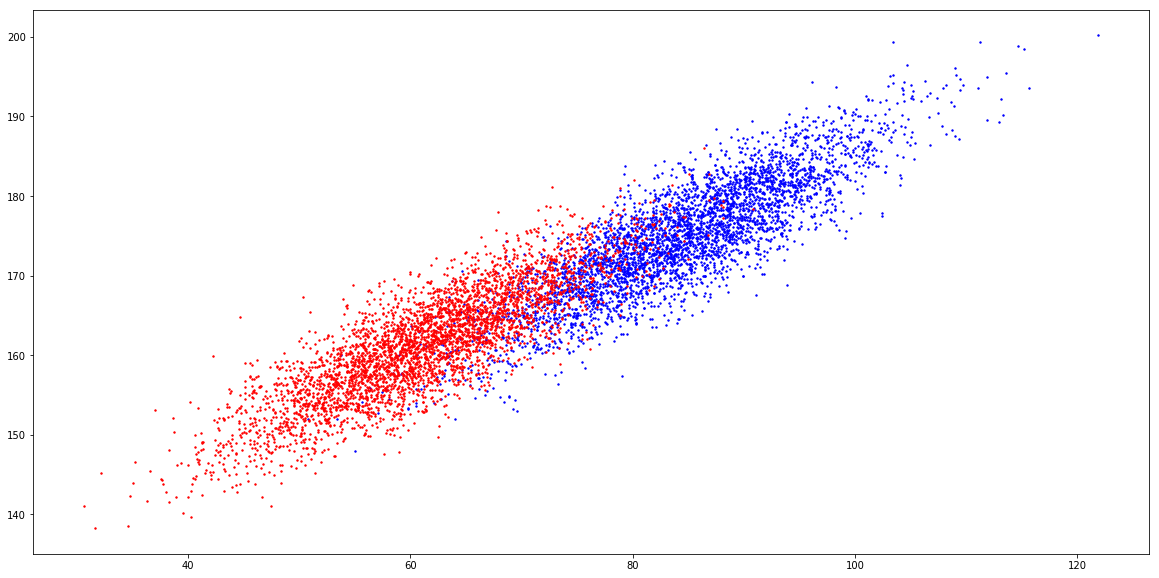

In [1113]:
plt.figure(figsize=(20,10))
plt.scatter(peso_hombres_float, altura_hombres_float, color='b', s=2)
plt.scatter(peso_mujeres_float, altura_mujeres_float, color='r', s=2)
plt.show()

# Redondeamos a enteros para las tuplas

In [1054]:
altura_hombres = np.round(altura_hombres_float).astype(int)
altura_mujeres = np.round(altura_mujeres_float).astype(int)
peso_hombres = np.round(peso_hombres_float).astype(int)
peso_mujeres = np.round(peso_mujeres_float).astype(int)

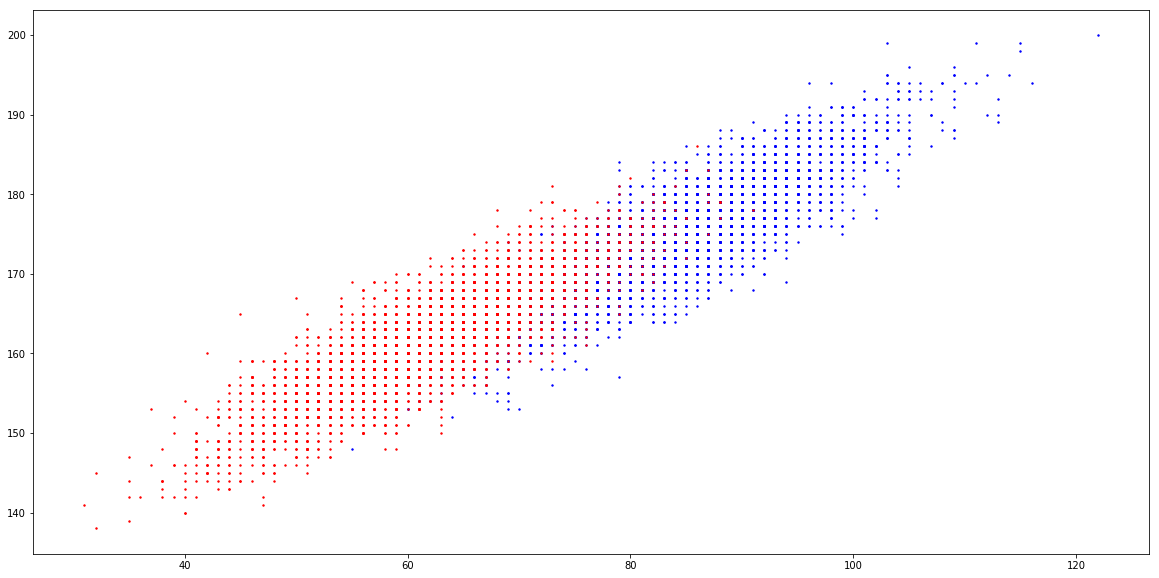

In [1060]:
plt.figure(figsize=(20,10))
plt.scatter(peso_hombres, altura_hombres, color='b', s=2)
plt.scatter(peso_mujeres, altura_mujeres, color='r', s=2)
plt.show()

In [1055]:
tuplas_hombres = [(p, altura_hombres[i]) for i, p in enumerate(peso_hombres)]
tuplas_mujeres = [(p, altura_mujeres[i]) for i, p in enumerate(peso_mujeres)]

In [1056]:
from collections import Counter

In [1057]:
frecuencias_hombres = Counter(tuplas_hombres)
frecuencias_mujeres = Counter(tuplas_mujeres)

In [768]:
def frec_2_matrix(frecuencias, min_col, max_col, min_row, max_row):
    conj_array = np.array([[p,a] for p,a in frecuencias.keys()])
    conjunta = np.zeros([max_col - min_col + 1, max_row-min_row + 1])
    for (p,a), f in frecuencias.items():
        conjunta[p - min_col, a - min_row] = f
    return conjunta

In [769]:
a_max = np.max([altura_hombres.max(), altura_mujeres.max()])
a_min = np.min([altura_hombres.min(), altura_mujeres.min()])
p_max = np.max([peso_hombres.max(), peso_mujeres.max()])
p_min = np.min([peso_hombres.min(), peso_mujeres.min()])
conjunta_hombres = frec_2_matrix(frecuencias_hombres, p_min, p_max, a_min, a_max)
conjunta_mujeres = frec_2_matrix(frecuencias_mujeres, p_min, p_max, a_min, a_max)

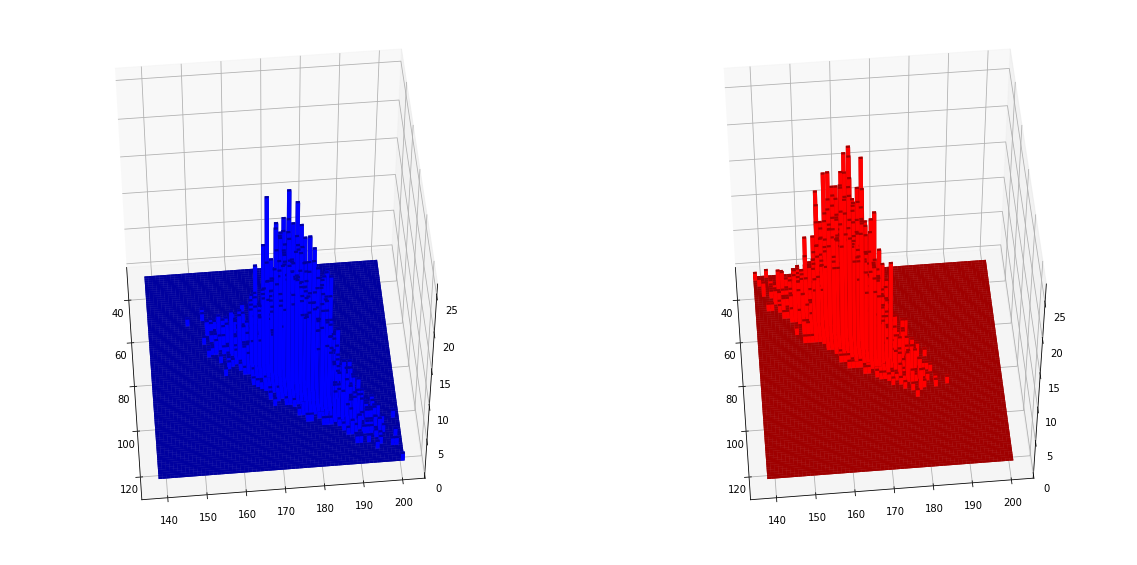

In [1199]:
from helper import plot_joint_3d 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
conjunta_np = plot_joint_3d(frecuencias_hombres, az=50, el=-5, ax=ax, p_max=p_max, a_max=a_max, p_min=p_min, a_min=a_min, color='b')
ax = fig.add_subplot(122, projection='3d')
conjunta_np = plot_joint_3d(frecuencias_mujeres, az=50, el=-5, ax=ax, p_max=p_max, a_max=a_max, p_min=p_min, a_min=a_min, color='r')
plt.show()

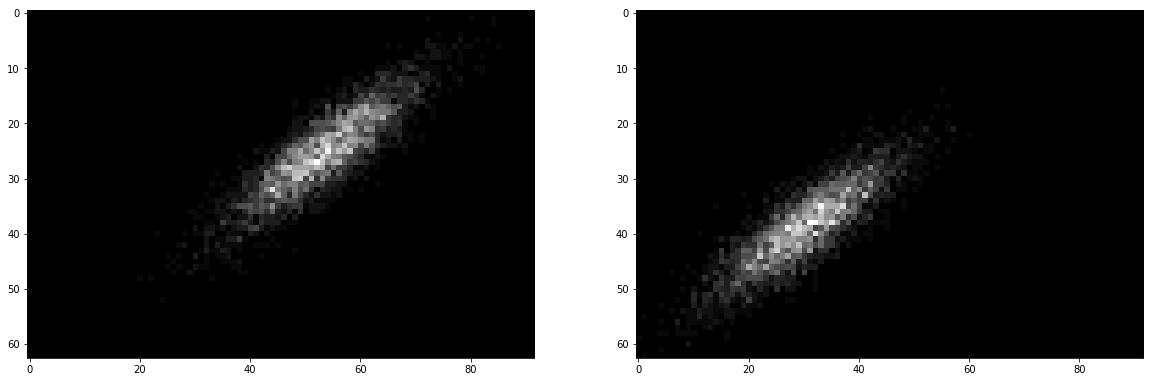

In [1114]:
f, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(np.flip(conjunta_hombres, axis=1).T, cmap='gray')
ax[1].imshow(np.flip(conjunta_mujeres, axis=1).T, cmap='gray')
plt.show()

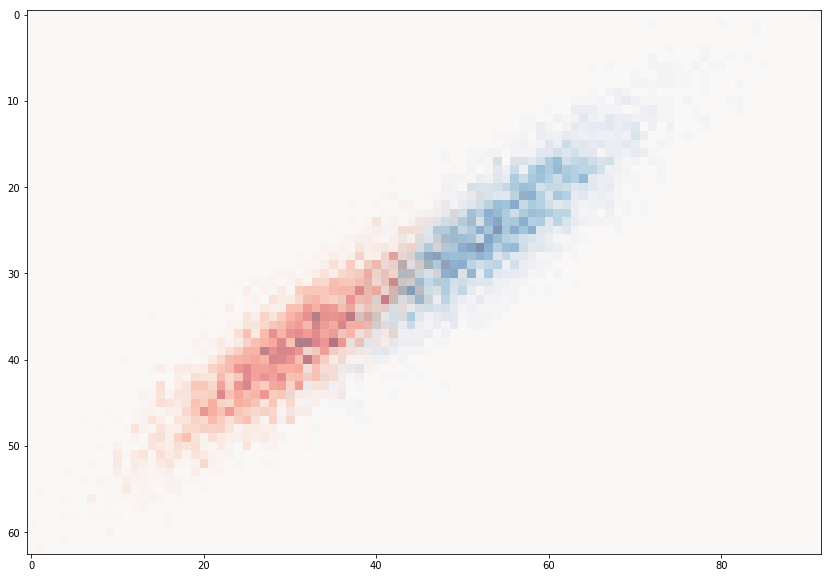

In [1043]:
plt.figure(figsize=(20,10))
plt.imshow(np.flip(conjunta_hombres, axis=1).T, cmap='Blues')
plt.imshow(np.flip(conjunta_mujeres, axis=1).T, cmap='Reds', alpha=0.5)
plt.show()

# Bayes

\begin{equation}
P(Hombre | X_1, X_2) = \frac{P(X_1,X_2 | Hombre) P(Hombre)}{P(X_1,X_2)} \\
P(Mujer | X_1, X_2) = \frac{P(X_1,X_2 | Mujer) P(Mujer)}{P(X_1,X_2)}
\end{equation}

In [1104]:
def get_class_prob(frec_class_1, frec_class_2, p, a):
    cant_class_1 = np.array(list(frec_class_1.values())).sum()
    cant_class_2 = np.array(list(frec_class_2.values())).sum()
    prior_class_1 = cant_class_1/(cant_class_1 + cant_class_2)
    prior_class_2 = cant_class_2/(cant_class_1 + cant_class_2)
    likelihood_class_1 = frec_class_1[(p, a)]/cant_class_1
    likelihood_class_2 = frec_class_2[(p, a)]/cant_class_2
    total = (frec_class_1[(p, a)] + frec_class_2[(p, a)])/(cant_class_1 + cant_class_2)
    # Si es cero da igual el resultado
    if total==0:
        return 0.5, 0.5
    p_class_1 = prior_class_1*likelihood_class_1/total
    p_class_2 = prior_class_2*likelihood_class_2/total
    return p_class_1, p_class_2

In [1105]:
def get_accuracy(data, frecuencias_hombres, frecuencias_mujeres):
    classifier_eval = []
    for i, row in data.iterrows():
        p_1, p_2 = get_class_prob(frecuencias_hombres, 
                                  frecuencias_mujeres, 
                                  int(np.round(row['Peso'])), 
                                  int(np.round(row['Altura'])))
        classifier_eval.append((p_1>p_2) == (row['Genero'] == 'Hombre'))
    return np.array(classifier_eval).sum()/len(data)

In [1106]:
%time get_accuracy(data, frecuencias_hombres, frecuencias_mujeres)

CPU times: user 2.08 s, sys: 22.4 ms, total: 2.1 s
Wall time: 2.11 s


0.92362500000000003

In [1107]:
get_accuracy(test, frecuencias_hombres, frecuencias_mujeres)

0.89549999999999996

In [1108]:
get_class_prob(frecuencias_hombres, frecuencias_mujeres, 68,165)

(0.17857142857142855, 0.82142857142857151)

In [1109]:
p_max - p_min

91

In [1110]:
X = np.linspace(p_min, p_max, p_max - p_min + 1)
Y = np.linspace(a_min, a_max, a_max - a_min + 1)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z = np.zeros(pos.shape[:2])
print(Z.shape)
for i, row in enumerate(pos):
    for j, col in enumerate(row):
        prob, _ = get_class_prob(frecuencias_hombres, frecuencias_mujeres, col[0], col[1])
        Z[i, j] = prob

(63, 92)


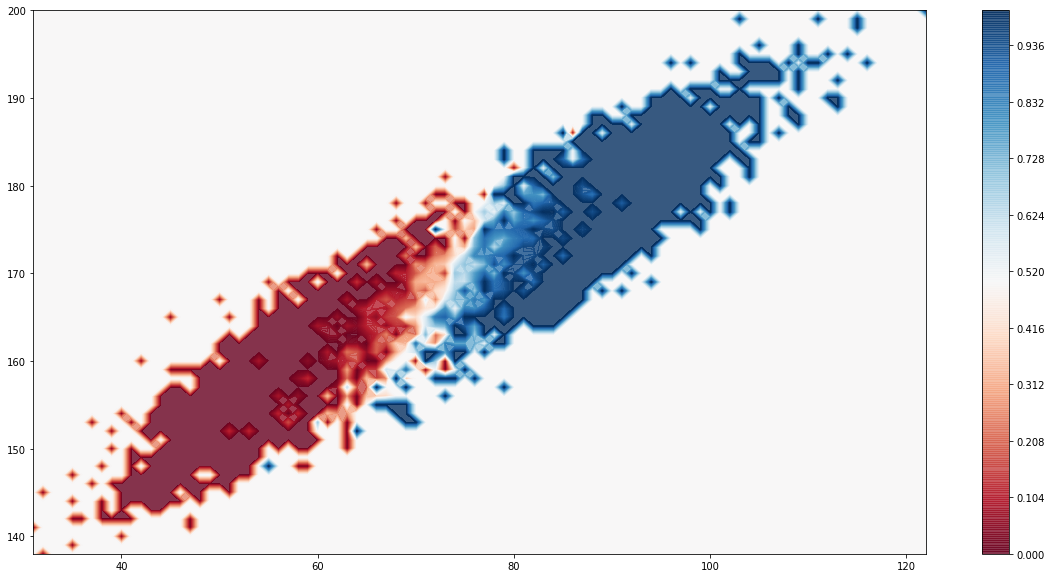

In [1112]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
plt.show()

## Naive Bayes (Supongo independencia)

In [1233]:
marg_pesos_hombres = conjunta_hombres.sum(axis=1)
marg_alturas_hombres = conjunta_hombres.sum(axis=0)
marg_pesos_mujeres = conjunta_mujeres.sum(axis=1)
marg_alturas_mujeres = conjunta_mujeres.sum(axis=0)

In [1234]:
marg_pesos_hombres_rep = np.repeat(marg_pesos_hombres.reshape(-1,1), len(marg_alturas_hombres), axis=1)
marg_alturas_hombres_rep = np.repeat(marg_alturas_hombres.reshape(-1,1), len(marg_pesos_hombres), axis=1).T
marg_pesos_mujeres_rep = np.repeat(marg_pesos_mujeres.reshape(-1,1), len(marg_alturas_mujeres), axis=1)
marg_alturas_mujeres_rep = np.repeat(marg_alturas_mujeres.reshape(-1,1), len(marg_pesos_mujeres), axis=1).T

In [1238]:
conj_indep_hombres = marg_pesos_hombres_rep*marg_alturas_hombres_rep
conj_indep_mujeres = marg_pesos_mujeres_rep*marg_alturas_mujeres_rep

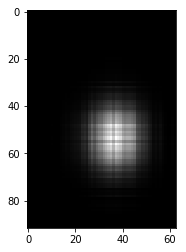

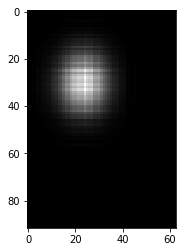

In [1241]:
plt.imshow(conj_indep_hombres, cmap='gray')
plt.show()
plt.imshow(conj_indep_mujeres, cmap='gray')
plt.show()

\begin{equation}
P(Hombre | X_1, X_2) = \frac{P(X_1 | Hombre) P(X_2 | Hombre) P(Hombre)}{P(X_1,X_2)} \\
P(Mujer | X_1, X_2) = \frac{P(X_1 | Mujer) P(X_2 | Mujer) P(Mujer)}{P(X_1,X_2)}
\end{equation}

In [1174]:
def get_Marginals(frecuencias):
    frecuencias_pesos = {}
    frecuencias_alturas = {}
    for (p,a), fr in frecuencias.items():
        if a not in frecuencias_alturas:
            frecuencias_alturas[a] = 0
        if p not in frecuencias_pesos:
            frecuencias_pesos[p] = 0
        frecuencias_pesos[p] = frecuencias_pesos[p] + fr
        frecuencias_alturas[a] = frecuencias_alturas[a] + fr
    return Counter(frecuencias_pesos), Counter(frecuencias_alturas)

In [1176]:
def get_class_prob_naive(frec_class_1, frec_class_2, p, a):
    frecuencias_pesos_class_1, frecuencias_alturas_class_1 = get_Marginals(frec_class_1)
    frecuencias_pesos_class_2, frecuencias_alturas_class_2 = get_Marginals(frec_class_2)
    cant_class_1 = np.array(list(frec_class_1.values())).sum()
    cant_class_2 = np.array(list(frec_class_2.values())).sum()
    prior_class_1 = cant_class_1/(cant_class_1 + cant_class_2)
    prior_class_2 = cant_class_2/(cant_class_1 + cant_class_2)
    likelihood_class_1 = frecuencias_pesos_class_1[p]/cant_class_1 * frecuencias_alturas_class_1[a]/cant_class_1
    likelihood_class_2 = frecuencias_pesos_class_2[p]/cant_class_2 * frecuencias_alturas_class_2[a]/cant_class_2
    total = likelihood_class_1*prior_class_1 + likelihood_class_2*prior_class_2
    # Si es cero da igual el resultado
    if total==0:
        return 0.5, 0.5
    p_class_1 = prior_class_1*likelihood_class_1/total
    p_class_2 = prior_class_2*likelihood_class_2/total
    return p_class_1, p_class_2

In [1177]:
def get_accuracy_naive(data, frecuencias_hombres, frecuencias_mujeres):
    classifier_eval = []
    for i, row in data.iterrows():
        p_1, p_2 = get_class_prob_naive(frecuencias_hombres, 
                                  frecuencias_mujeres, 
                                  int(np.round(row['Peso'])), 
                                  int(np.round(row['Altura'])))
        classifier_eval.append((p_1>p_2) == (row['Genero'] == 'Hombre'))
    return np.array(classifier_eval).sum()/len(data)

In [1178]:
get_accuracy_naive(data, frecuencias_hombres, frecuencias_mujeres)

0.88887499999999997

In [1179]:
get_accuracy_naive(test, frecuencias_hombres, frecuencias_mujeres)

0.89200000000000002

In [1180]:
X = np.linspace(p_min, p_max, p_max - p_min + 1)
Y = np.linspace(a_min, a_max, a_max - a_min + 1)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z = np.zeros(pos.shape[:2])
print(Z.shape)
for i, row in enumerate(pos):
    for j, col in enumerate(row):
        prob, _ = get_class_prob_naive(frecuencias_hombres, frecuencias_mujeres, col[0], col[1])
        Z[i, j] = prob

(63, 92)


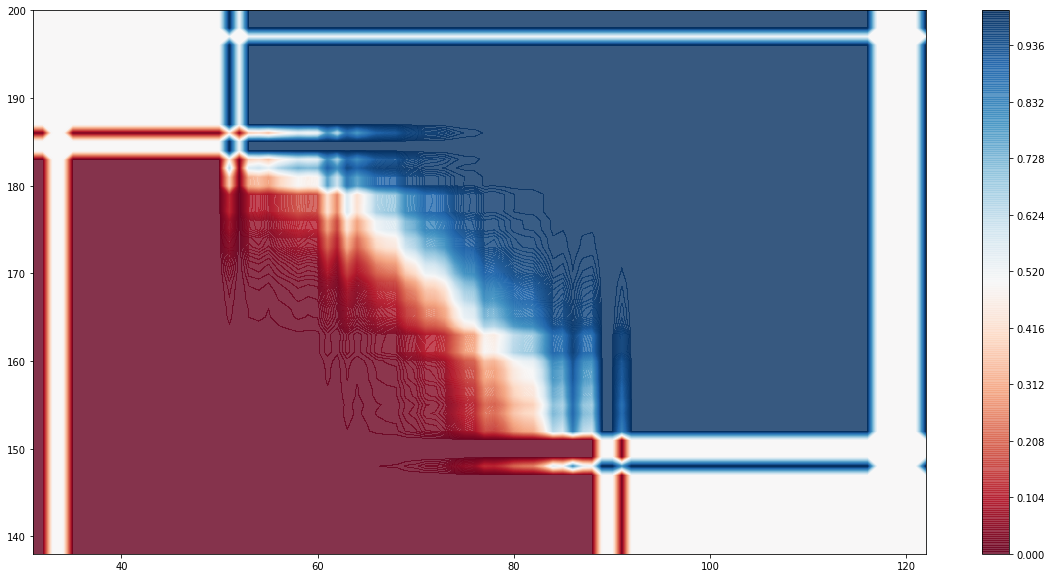

In [1189]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
plt.show()

# Gaussiano

\begin{equation}
P(Hombre | X_1, X_2) = \frac{p(X_1,X_2 | Hombre) P(Hombre)}{p(X_1,X_2)} \\
P(Mujer | X_1, X_2) = \frac{p(X_1,X_2 | Mujer) P(Mujer)}{p(X_1,X_2)} \\
p(X_1,X_2) = p(X_1,X_2 | Hombre) P(Hombre) + p(X_1,X_2 | Mujer) P(Mujer)
\end{equation}

In [775]:
peso_altura_hombres = data.loc[data['Genero']=='Hombre'][['Peso', 'Altura']].values
peso_altura_mujeres = data.loc[data['Genero']=='Mujer'][['Peso', 'Altura']].values

In [776]:
mean_hombres = peso_altura_hombres.mean(axis=0)
mean_mujeres = peso_altura_mujeres.mean(axis=0)

In [777]:
print(mean_todos)

[  72.7339  168.0733]


In [778]:
cov_hombres = np.cov(peso_altura_hombres.T)
cov_mujeres = np.cov(peso_altura_mujeres.T)

In [779]:
print(cov_todos)

[[ 212.3491257   131.63576871]
 [ 131.63576871   95.5558827 ]]


In [780]:
from scipy.stats import multivariate_normal

In [781]:
len(unique_hombres)

785

In [792]:
def get_prob(data):
    data_np = data
    likelihood_class_1 = multivariate_normal.pdf(data_np, mean_hombres, cov_hombres)
    likelihood_class_2 = multivariate_normal.pdf(data_np, mean_mujeres, cov_mujeres)
    N_class_1 = len(peso_altura_hombres)
    N_class_2 = len(peso_altura_mujeres)
    prior_1 = N_class_1/(N_class_1 + N_class_2)
    prior_2 = N_class_2/(N_class_1 + N_class_2)
    total = likelihood_class_1 * prior_1 + likelihood_class_2 * prior_2
    p_class_1 = likelihood_class_1 * prior_1/total
    p_class_2 = likelihood_class_2 * prior_2/total
    return p_class_1, p_class_2

In [793]:
def get_acc_gauss(data):
    p_class_1, p_class_2 = get_prob(data[['Peso', 'Altura']].values)
    return ((p_class_1>p_class_2)==(data['Genero']=='Hombre')).sum()/len(p_class_1)

In [794]:
%time get_acc_gauss(data)

CPU times: user 6.52 ms, sys: 712 µs, total: 7.23 ms
Wall time: 6.69 ms


0.917875

In [795]:
print(get_acc_gauss(test))

0.925


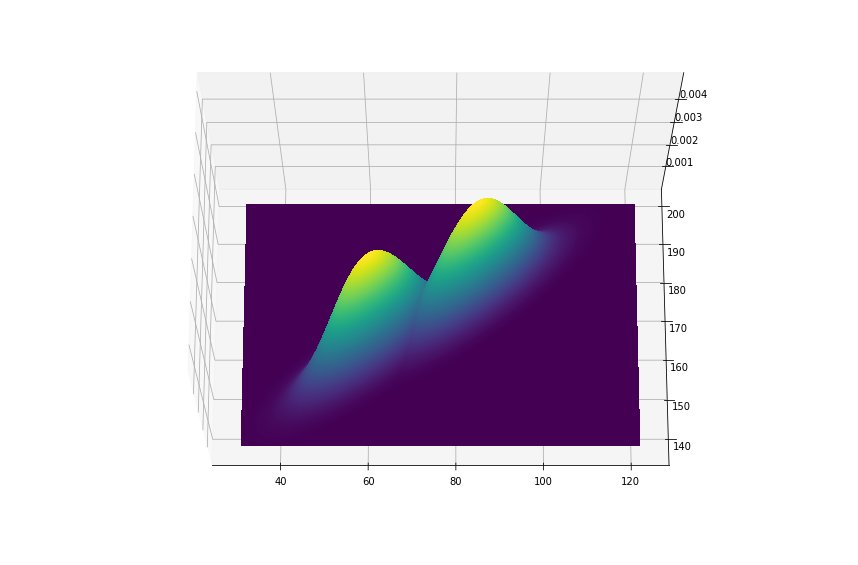

In [1088]:
N = 300
Y = np.linspace(a_min, a_max, N)
X = np.linspace(p_min, p_max, N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# The distribution on the variables X, Y packed into pos.
Z_H = multivariate_normal.pdf(pos, mean_hombres, cov_hombres)
Z_M = multivariate_normal.pdf(pos, mean_mujeres, cov_mujeres)
Z, _ = get_prob(pos)

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
#plt.colorbar(cf, ax=ax)
ax.contourf(X, Y, Z_H, 256)
ax.contourf(X, Y, Z_M, 256)
ax.view_init(70, -90)
plt.show()

In [1089]:
Z.shape

(300, 300)

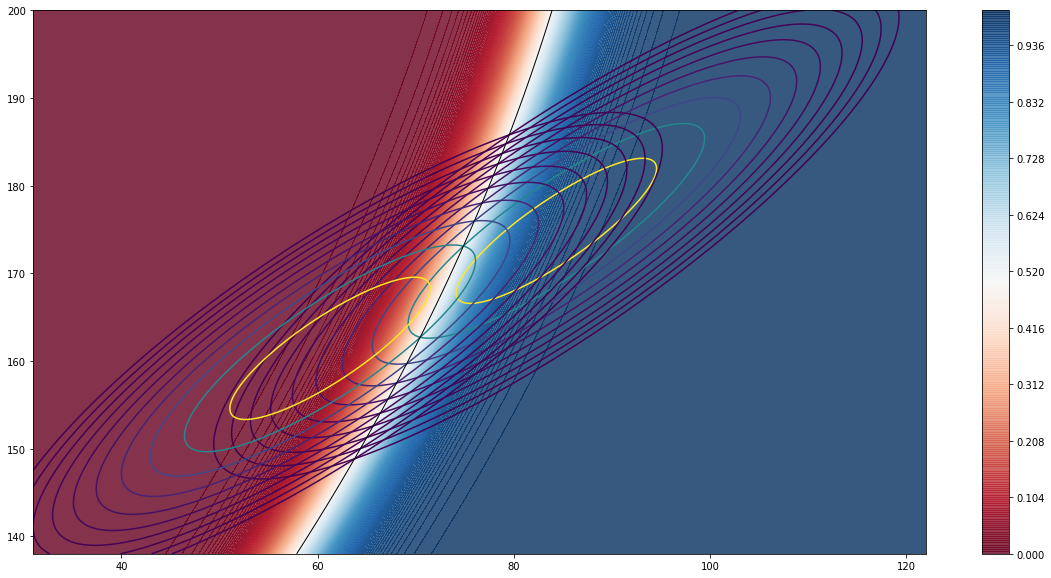

In [909]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
z_levels = np.logspace(-5,-2,10)/4
ax.contour(X, Y, Z_H, z_levels)
ax.contour(X, Y, Z_M, z_levels)
ax.contour(X, Y, Z, (0.5,), colors='k', linewidths=1)
plt.show()

# Naive Bayes

In [877]:
cov_hombres*np.identity(2)

array([[ 80.71265449,   0.        ],
       [  0.        ,  52.97585742]])

In [878]:
def get_prob_naive(data):
    data_np = data
    likelihood_class_1 = multivariate_normal.pdf(data_np, mean_hombres, cov_hombres*np.identity(2))
    likelihood_class_2 = multivariate_normal.pdf(data_np, mean_mujeres, cov_mujeres*np.identity(2))
    N_class_1 = len(peso_altura_hombres)
    N_class_2 = len(peso_altura_mujeres)
    prior_1 = N_class_1/(N_class_1 + N_class_2)
    prior_2 = N_class_2/(N_class_1 + N_class_2)
    total = likelihood_class_1 * prior_1 + likelihood_class_2 * prior_2
    p_class_1 = likelihood_class_1 * prior_1/total
    p_class_2 = likelihood_class_2 * prior_2/total
    return p_class_1, p_class_2

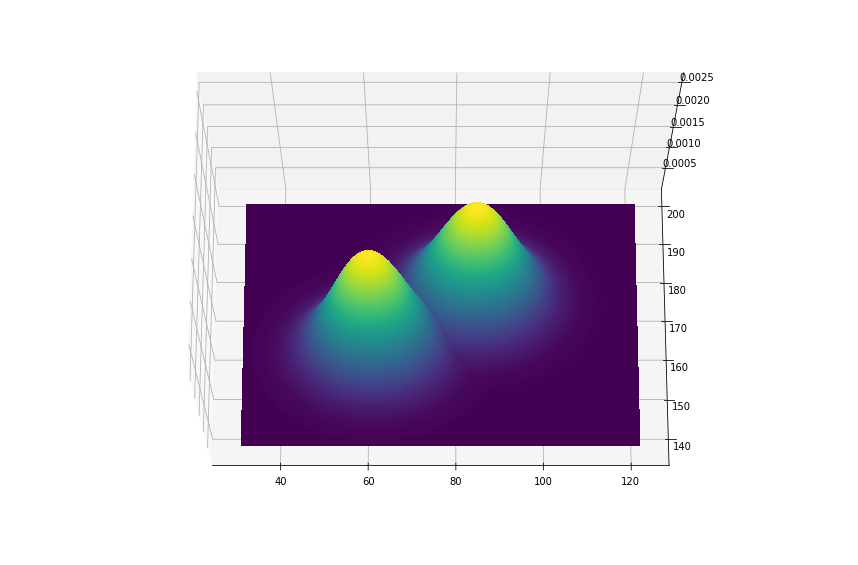

In [931]:
N = 300
Y = np.linspace(a_min, a_max, N)
X = np.linspace(p_min, p_max, N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# The distribution on the variables X, Y packed into pos.
Z_H = multivariate_normal.pdf(pos, mean_hombres, cov_hombres*np.identity(2))
Z_M = multivariate_normal.pdf(pos, mean_mujeres, cov_mujeres*np.identity(2))
Z, _ = get_prob_naive(pos)

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
#plt.colorbar(cf, ax=ax)
ax.contourf(X, Y, Z_H, 256)
ax.contourf(X, Y, Z_M, 256)
ax.view_init(70, -90)
plt.show()

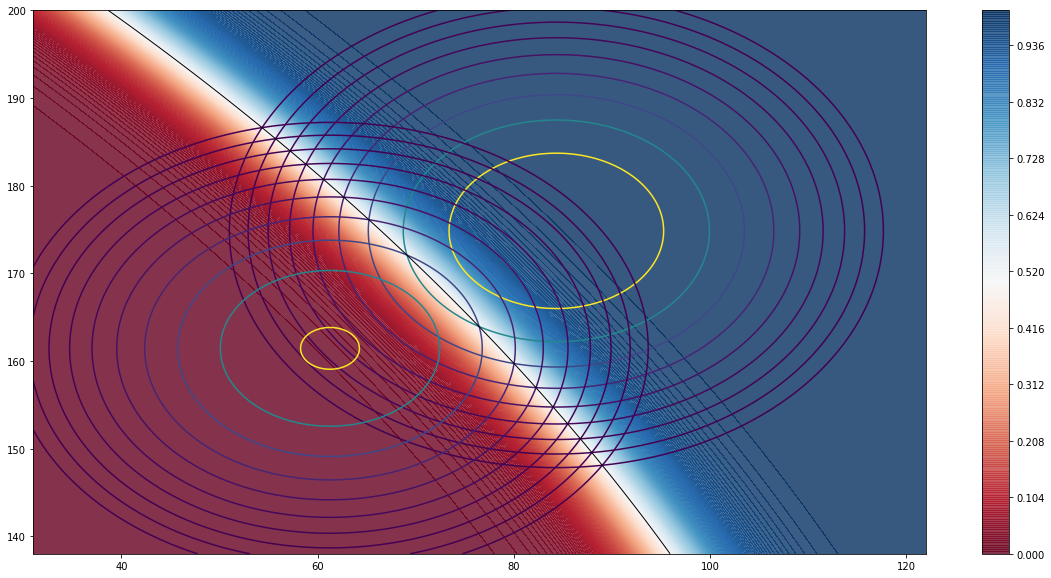

In [907]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
z_levels = np.logspace(-5,-2,10)/4
ax.contour(X, Y, Z_H, z_levels)
ax.contour(X, Y, Z_M, z_levels)
ax.contour(X, Y, Z, (0.5,), colors='k', linewidths=1)
plt.show()

In [882]:
def get_acc_gauss_naive(data):
    p_class_1, p_class_2 = get_prob_naive(data[['Peso', 'Altura']].values)
    return ((p_class_1>p_class_2)==(data['Genero']=='Hombre')).sum()/len(p_class_1)

In [884]:
get_acc_gauss_naive(data)

0.88524999999999998

In [885]:
get_acc_gauss_naive(test)

0.88949999999999996